<a href="https://colab.research.google.com/github/ishankarve/Linear-Regression/blob/main/Multiple%20Linear%20Regression%20in%20Python/Assignment/Bike%20Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective**
Build a multiple linear regression model for the prediction of demand for shared bikes. 

### **Problem Statement**

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 


### **Business Goal**

Find variables are significant in predicting the demand for shared bikes and how well those variables describe the bike demands
Based on various **meteorological surveys** and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Based on the goal mentioned above, model the demand for shared bikes with the available independent variables.

### **Data Caveats**

1.   In the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as described in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

2.  The column 'yr' has two values 0 and 1 indicating the years 2018 and 2019 respectively. Since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 


### **Model Building**

In the dataset provided,there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. ***The model should be built taking this 'cnt' as the target variable.***

### **Step 1: Import Libraries**


In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [139]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### **Step 2: Import Data**

In [140]:
#import data from gihub link
df_bikeshare=pd.read_csv("https://raw.githubusercontent.com/ishankarve/Linear-Regression/main/Multiple%20Linear%20Regression%20in%20Python/Assignment/day.csv")

In [141]:
df_bikeshare.head(730)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


# **Data Dictionary**
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### **Step 3: Undertake sanity checks on data**

In [142]:
#get shape of the dataframe
df_bikeshare.shape

(730, 16)

In [143]:
#check column dtypes
df_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [144]:
#get list of unique variables per column
print(df_bikeshare.nunique())

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


In [145]:
# get count of non-na values across all columns
df_bikeshare.apply(lambda x: x.count(), axis=0)

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

In [146]:
# convert 'dteday' from 'object' to 'datetime'
df_bikeshare['dteday'] = pd.to_datetime(df_bikeshare['dteday'], format='%d-%m-%Y') #date is in 01-01-2018 format

In [147]:
#describe dataframe
df_bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### **Step 4: Cleaning & Binning Numerical Categorical Data**

In [148]:
#extracting day from date
df_bikeshare["day"]=df_bikeshare.dteday.dt.day

In [149]:
#binning weekday  into labelled bins
bin_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
bins = [-1,0,1,2,3,4,5,6]
df_bikeshare['weekday_binned'] = pd.cut(df_bikeshare['weekday'], bins=bins, labels=bin_labels)

In [150]:
#binning months into labelled months)
bin_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_bikeshare['mnth_binned'] = pd.cut(df_bikeshare['mnth'], bins=bins, labels=bin_labels)

In [151]:
#binning months into labelled months)
bin_labels = ['Clear', 'Cloudy', 'Light_RainSnow', 'Heavy_RainSnow']
bins = [0, 1, 2, 3, 4]
df_bikeshare['weathersit_binned'] = pd.cut(df_bikeshare['weathersit'], bins=bins, labels=bin_labels)

In [152]:
#binning seasons into labelled variables
bin_labels = ['Spring', 'Summer', 'Autumn', 'Winter']
bins = [0, 1, 2, 3, 4]
df_bikeshare['season_binned'] = pd.cut(df_bikeshare['season'], bins=bins, labels=bin_labels)

### **Step 5: Prelimnary Visualisation**
Since all data is numeric, we can use plots to visualise data 

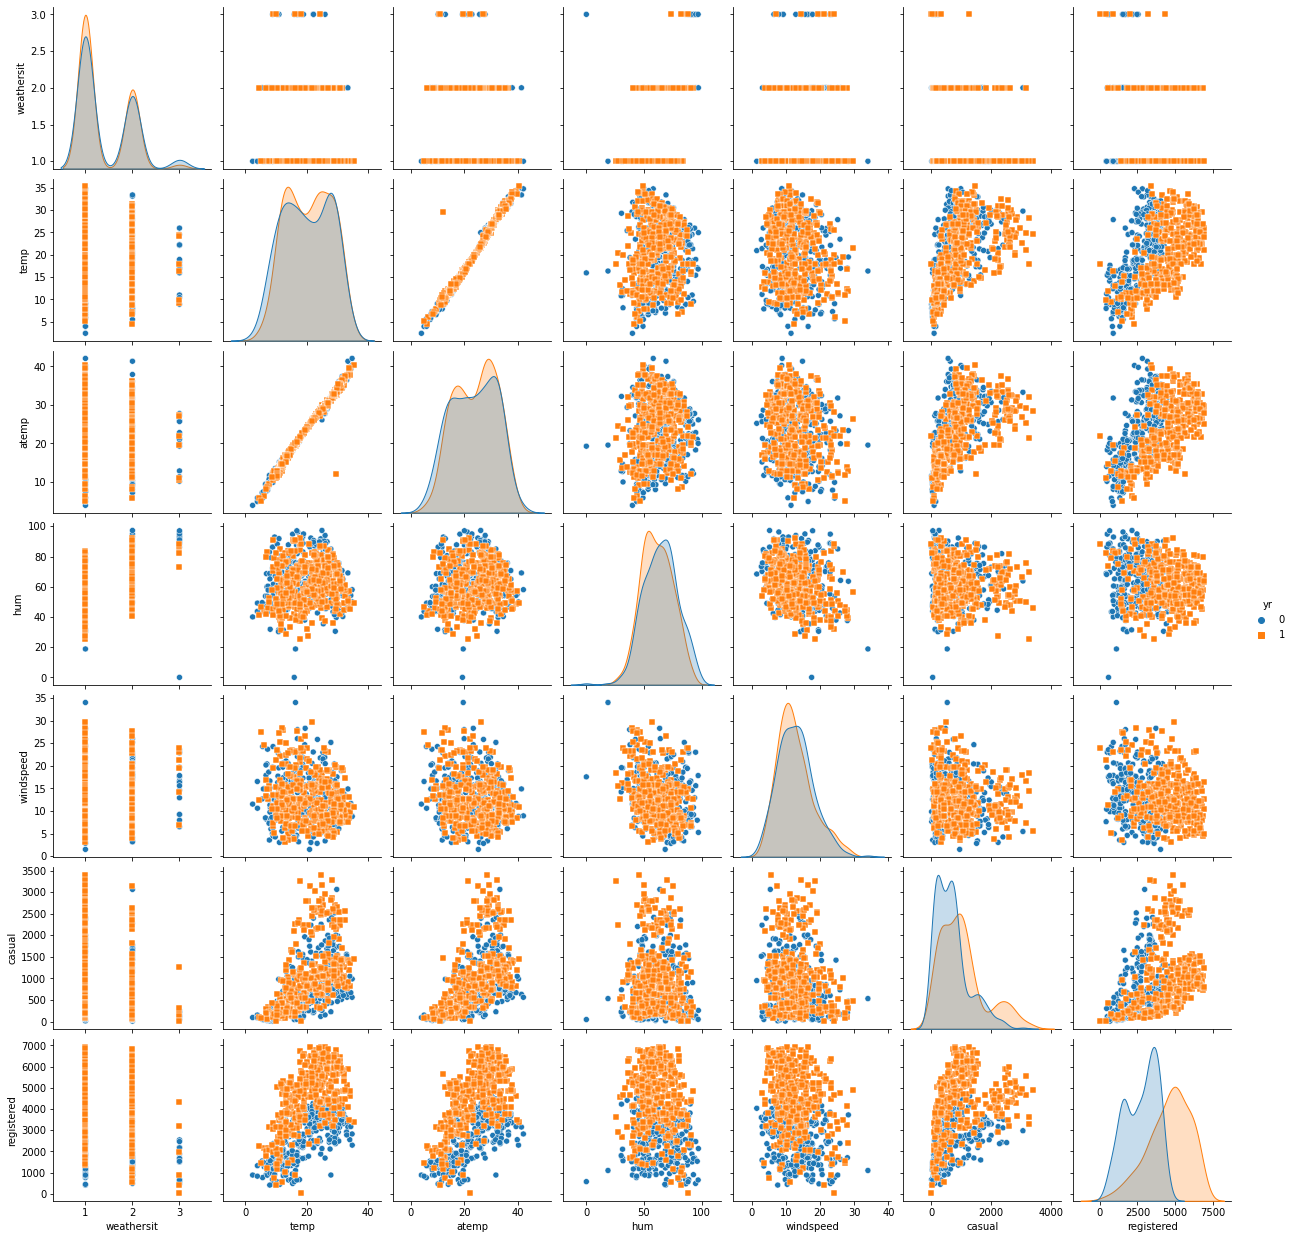

In [153]:
#plotting pairplot of continious variables
#Reference: https://stackoverflow.com/questions/64556501/plot-only-some-columns-with-seaborn-pairplot
cols_to_plot = df_bikeshare.columns[8:15].tolist() + ['yr'] # explicitly add the column "yr" to your list of columns to plot
sns.pairplot(df_bikeshare[cols_to_plot], hue ="yr", markers=["o", "s"])
plt.show()


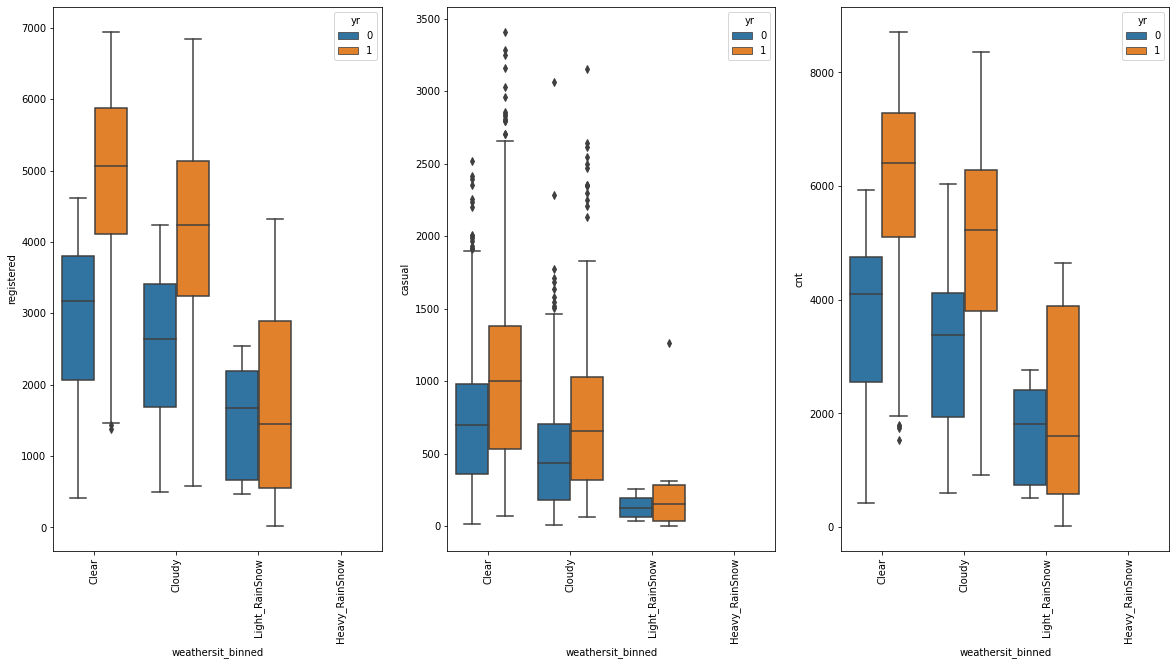

In [154]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weathersit_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'weathersit_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'weathersit_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

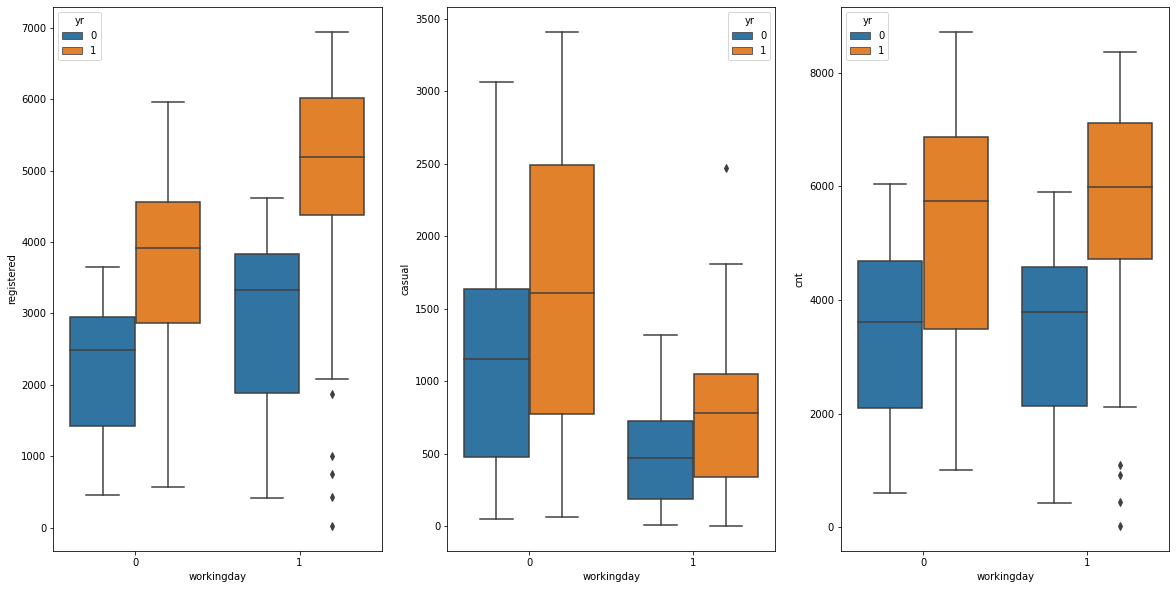

In [155]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'workingday', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'workingday', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

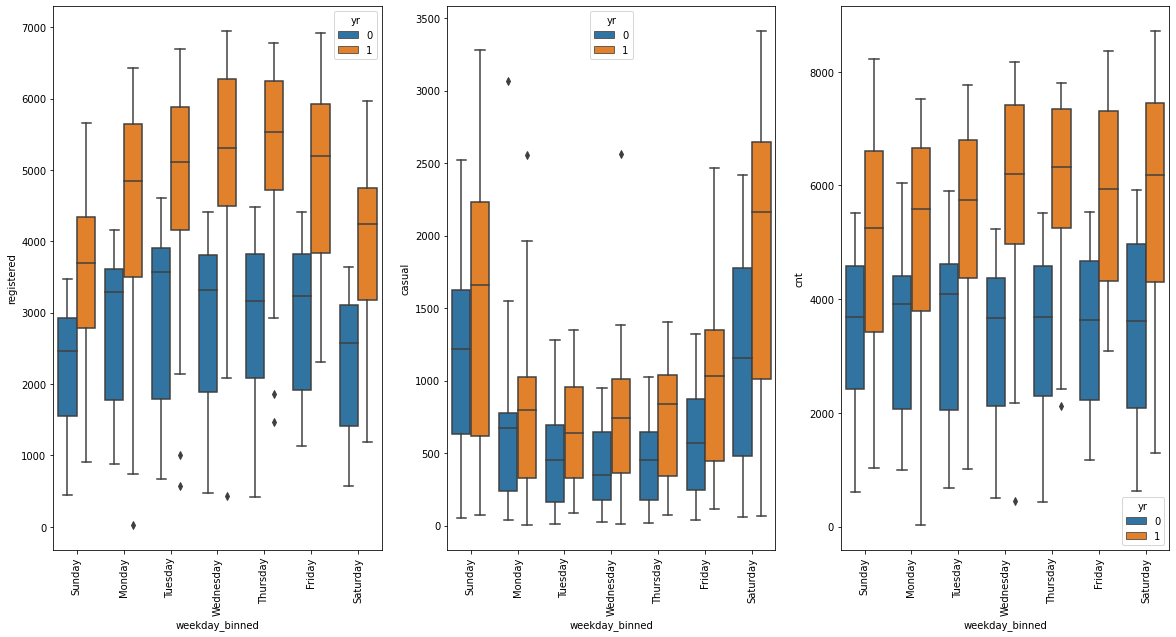

In [156]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weekday_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'weekday_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'weekday_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

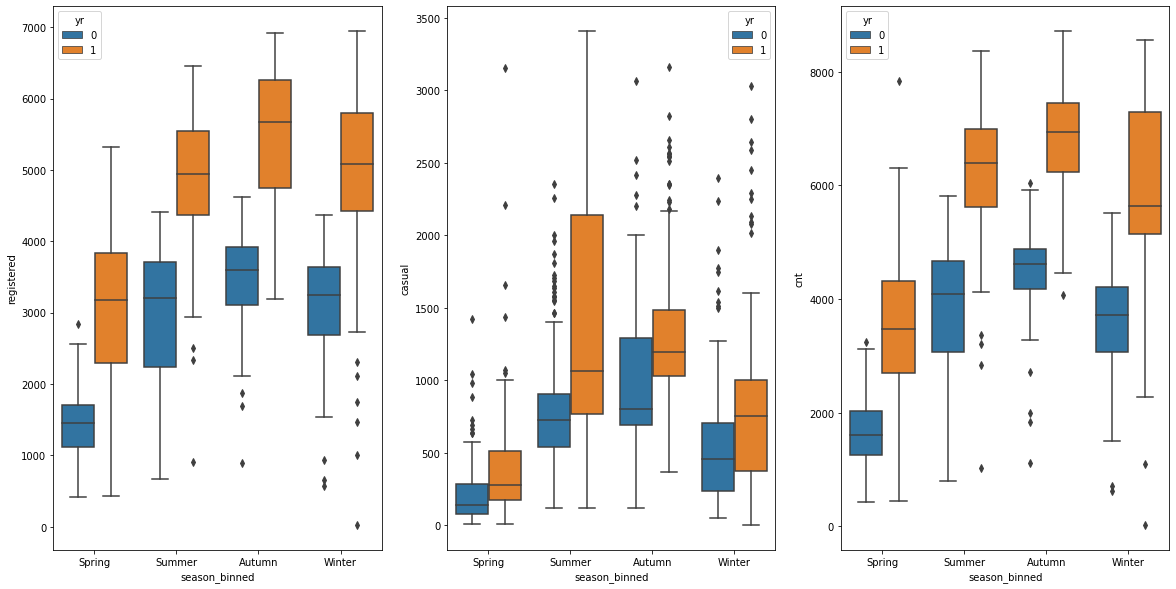

In [157]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'season_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'season_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'season_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

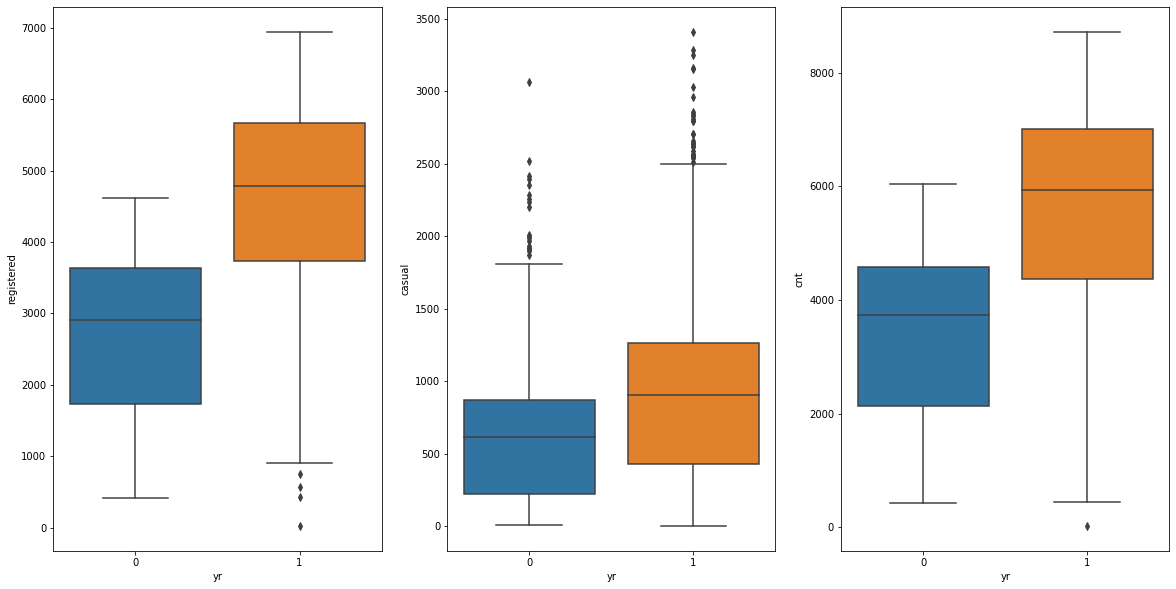

In [158]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'yr', y = 'registered', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'yr', y = 'casual', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikeshare)
plt.show()

In [159]:
#plot chart per day to find specific days where surge can be expected

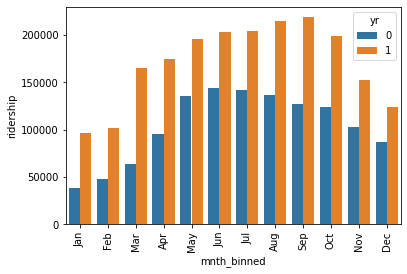

In [160]:
#plot variation across months
# perform groupby
df = df_bikeshare.groupby(['mnth_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="mnth_binned",y="ridership",hue="yr",data=df)
plt.xticks(rotation='vertical')
plt.show()

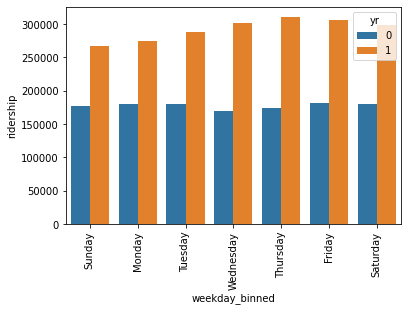

In [161]:
#plot variation across weekdays
# perform groupby
df = df_bikeshare.groupby(['weekday_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="weekday_binned",y="ridership",hue='yr',data=df)
plt.xticks(rotation='vertical')
plt.show()

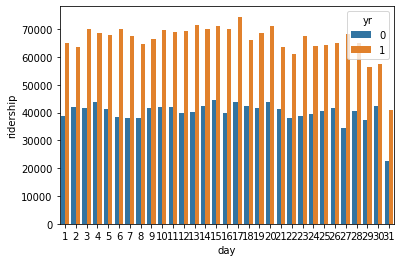

In [162]:
#plot variation across day
# perform groupby
df = df_bikeshare.groupby(['day','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
#plot barplot
sns.barplot(x="day",y="ridership",hue='yr',data=df)

plt.show()

In [163]:
print(df_bikeshare.nunique())

instant              730
dteday               730
season                 4
yr                     2
mnth                  12
holiday                2
weekday                7
workingday             2
weathersit             3
temp                 498
atemp                689
hum                  594
windspeed            649
casual               605
registered           678
cnt                  695
day                   31
weekday_binned         7
mnth_binned           12
weathersit_binned      3
season_binned          4
dtype: int64


In [164]:
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day', 'weekday_binned', 'mnth_binned',
       'weathersit_binned', 'season_binned'],
      dtype='object')

### **Step 6: Creating Dummy Variables**

In [165]:
#create dummy variables for binned categorial variables
weathersit_dummy = pd.get_dummies(df_bikeshare['weathersit_binned'],drop_first=True)
weekday_dummy = pd.get_dummies(df_bikeshare['weekday_binned'],drop_first=True)
mnth_dummy = pd.get_dummies(df_bikeshare['mnth_binned'],drop_first=True)
season_dummy = pd.get_dummies(df_bikeshare['season_binned'],drop_first=True)

In [166]:
#drop corresponding categorical variables
#Reference: https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
df_bikeshare.drop(list(df_bikeshare.filter(regex = 'binned')), axis = 1, inplace = True)

In [167]:
#check dataframe for columns deletion
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day'],
      dtype='object')

In [171]:
#check variables
print(weathersit_dummy.nunique())
print(weekday_dummy.nunique())
print(mnth_dummy.nunique())
print(season_dummy.nunique())

Cloudy            2
Light_RainSnow    2
Heavy_RainSnow    1
dtype: int64
Monday       2
Tuesday      2
Wednesday    2
Thursday     2
Friday       2
Saturday     2
dtype: int64
Feb    2
Mar    2
Apr    2
May    2
Jun    2
Jul    2
Aug    2
Sep    2
Oct    2
Nov    2
Dec    2
dtype: int64
Summer    2
Autumn    2
Winter    2
dtype: int64


In [172]:
#concat dummy variable dataframe to the main dataframe
df_bikeshare = pd.concat([df_bikeshare, weathersit_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, weekday_dummy], axis = 1)                         
df_bikeshare = pd.concat([df_bikeshare, mnth_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, season_dummy], axis = 1)

In [173]:
#check dataframe for columns concatenation
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day', 'Cloudy', 'Light_RainSnow',
       'Heavy_RainSnow', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

In [174]:
#drop columns where there is no variable diversity
for col in df_bikeshare.columns:
    if len(df_bikeshare[col].unique()) == 1:
        df_bikeshare.drop(col,inplace=True,axis=1)

In [175]:
#check master dataframe
print(df_bikeshare.nunique())


instant           730
dteday            730
season              4
yr                  2
mnth               12
holiday             2
weekday             7
workingday          2
weathersit          3
temp              498
atemp             689
hum               594
windspeed         649
casual            605
registered        678
cnt               695
day                31
Cloudy              2
Light_RainSnow      2
Monday              2
Tuesday             2
Wednesday           2
Thursday            2
Friday              2
Saturday            2
Feb                 2
Mar                 2
Apr                 2
May                 2
Jun                 2
Jul                 2
Aug                 2
Sep                 2
Oct                 2
Nov                 2
Dec                 2
Summer              2
Autumn              2
Winter              2
dtype: int64


In [176]:
df_bikeshare.columns.tolist()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'day',
 'Cloudy',
 'Light_RainSnow',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Summer',
 'Autumn',
 'Winter']

In [177]:
#drop original categorical and redundant columns
df_bikeshare.drop(['instant',
 'dteday',
 'season',
 'mnth',
 'weekday',
 'weathersit',
 'atemp',                 
 'casual',
 'registered'], axis = 1, inplace = True)
df_bikeshare.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,Cloudy,Light_RainSnow,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Summer,Autumn,Winter
0,0,0,0,14.110847,80.5833,10.749882,985,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,5,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,6,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,7,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,6.765000,53.5833,17.875868,959,8,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,5.671653,43.4167,24.250650,822,9,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,10,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Step 7: Splitting and Scaling data**

In [178]:
#check dataframe
print(df_bikeshare.nunique())

yr                  2
holiday             2
workingday          2
temp              498
hum               594
windspeed         649
cnt               695
day                31
Cloudy              2
Light_RainSnow      2
Monday              2
Tuesday             2
Wednesday           2
Thursday            2
Friday              2
Saturday            2
Feb                 2
Mar                 2
Apr                 2
May                 2
Jun                 2
Jul                 2
Aug                 2
Sep                 2
Oct                 2
Nov                 2
Dec                 2
Summer              2
Autumn              2
Winter              2
dtype: int64


In [179]:
## before we split the data we are going to copy the data in three dataframes for 3 modelling strategies

#copy dataframe
s1_df=df_bikeshare.copy()
# s2_df=df_bikeshare.copy()
# s3_df=df_bikeshare.copy()

In [180]:
#splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(564)
s1_train, s1_test = train_test_split(s1_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [181]:
s1_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'day',
       'Cloudy', 'Light_RainSnow', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

In [182]:
#set up scaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except  'cnt' variable
num_vars=s1_train.columns.tolist()
num_vars.remove('cnt')
s1_train[num_vars] = scaler.fit_transform(s1_train[num_vars])

In [183]:
s1_train.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,Cloudy,Light_RainSnow,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Summer,Autumn,Winter
653,1.0,0.0,1.0,0.509887,0.575354,0.300794,7534,0.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,7216,1.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,4066,0.066667,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,1796,0.966667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,4220,0.900000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
111,0.0,0.0,1.0,0.345824,0.751824,0.380981,1683,0.700000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
580,1.0,0.0,0.0,0.914852,0.632030,0.462538,6824,0.100000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500,1.0,0.0,1.0,0.719639,0.719193,0.172431,7424,0.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
479,1.0,0.0,1.0,0.520271,0.440962,0.164434,6196,0.800000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
472,1.0,0.0,1.0,0.503656,0.586518,0.270032,4367,0.566667,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


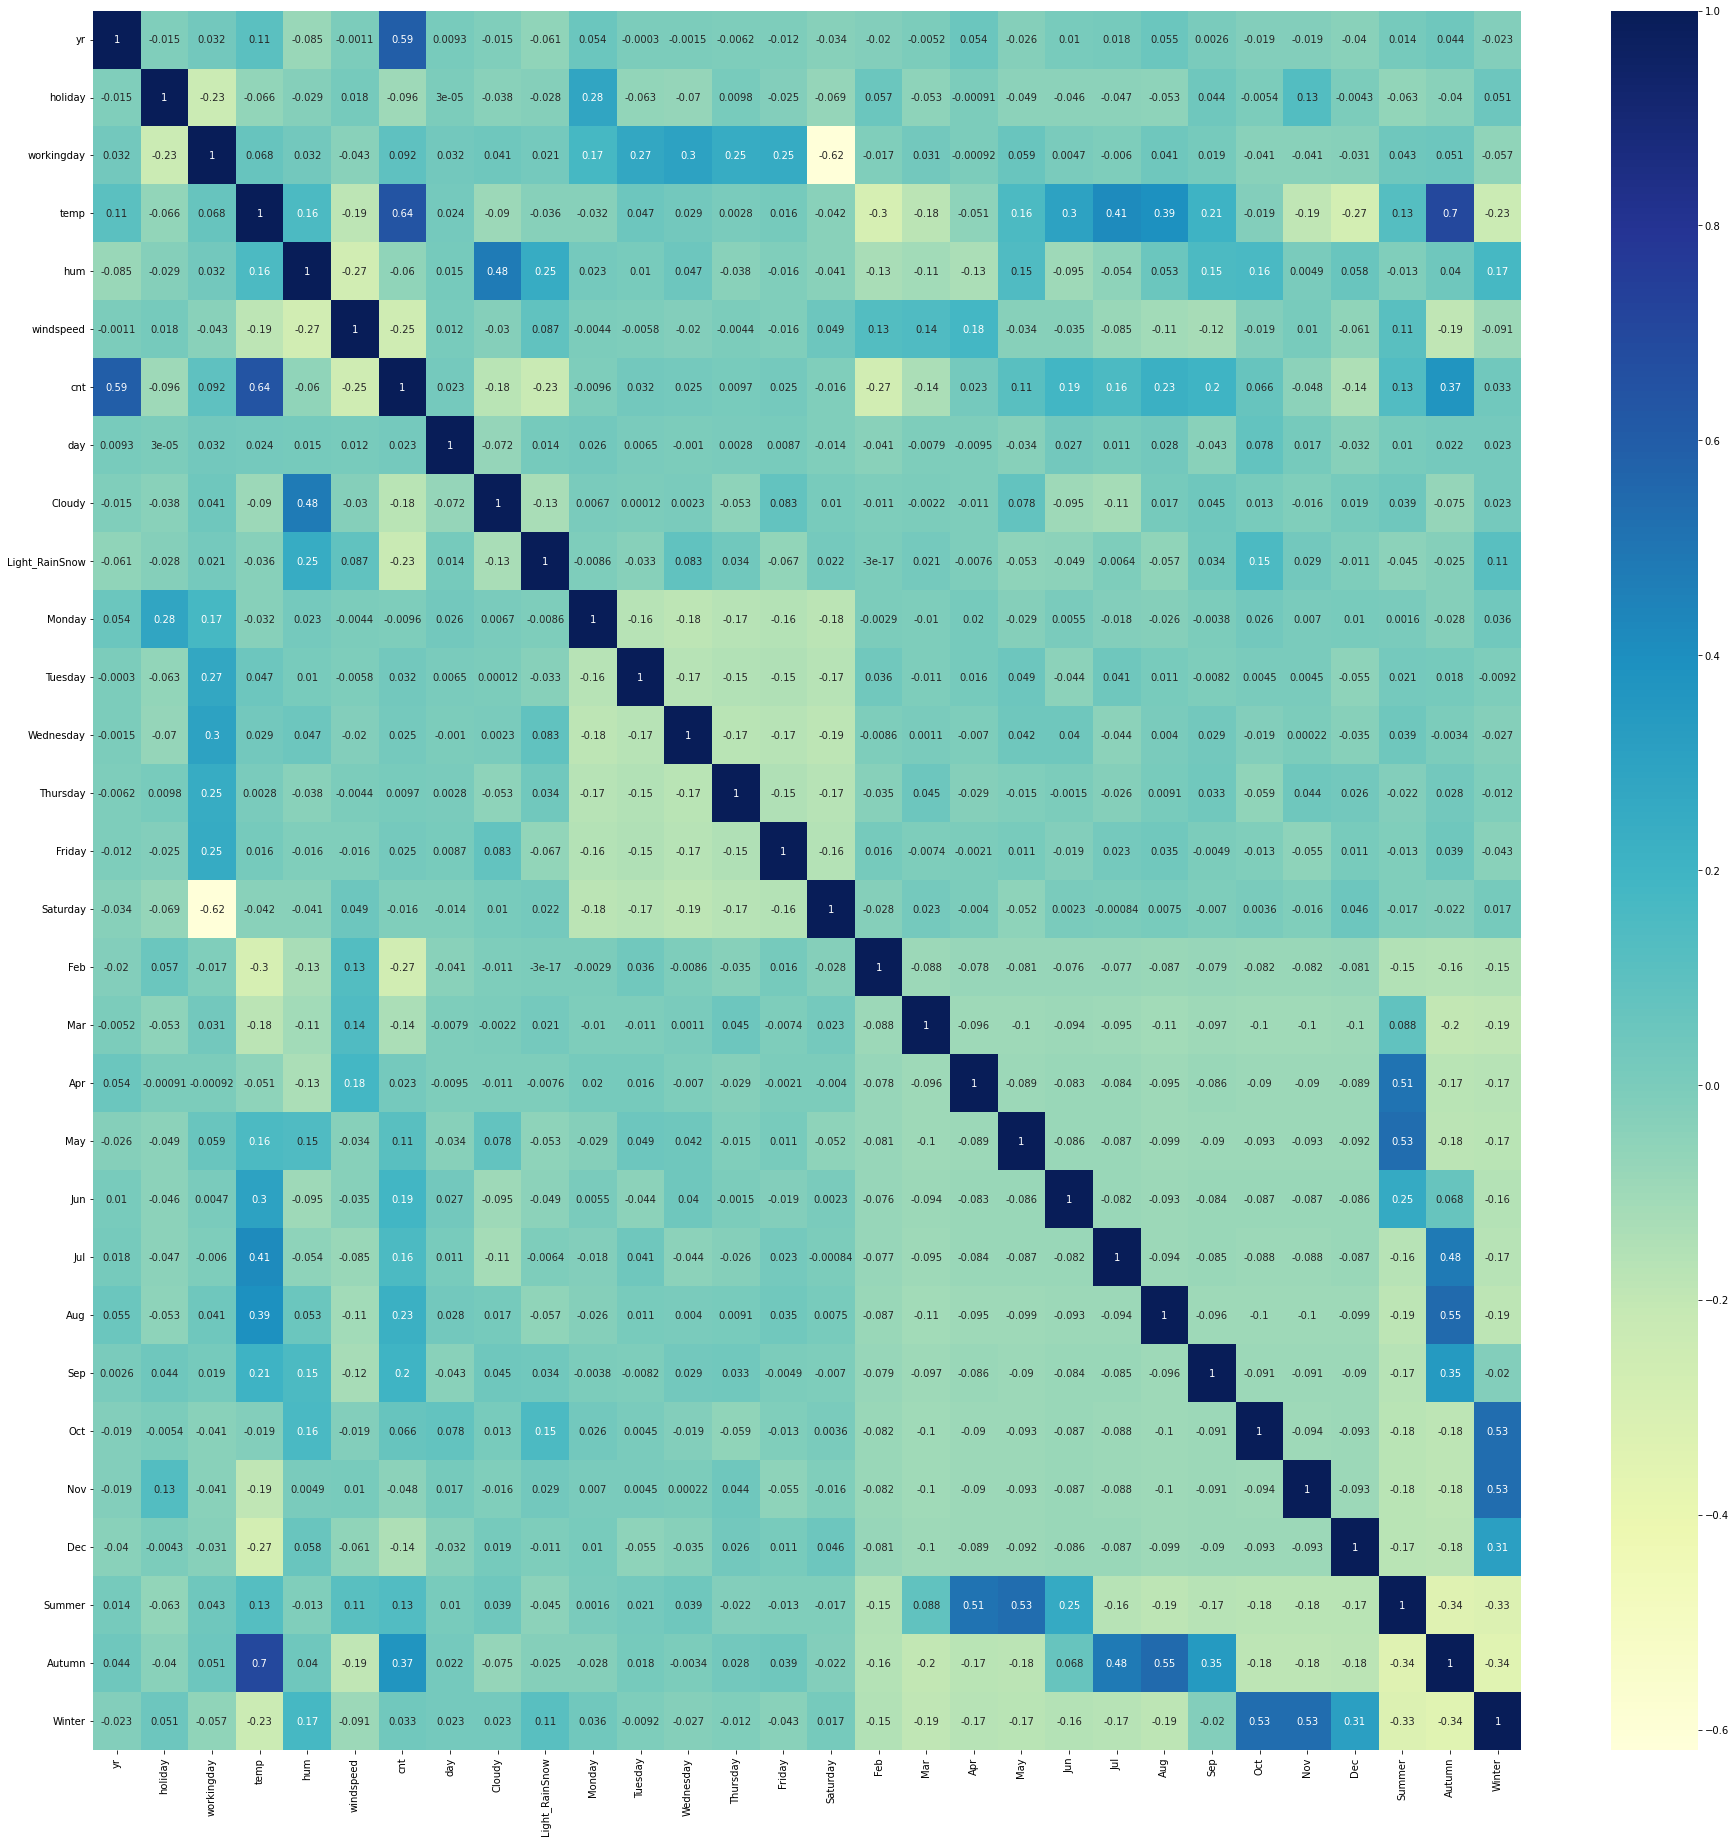

In [184]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (32, 32))
sns.heatmap(s1_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [185]:
#check column dtypes
s1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    float64
 1   holiday         510 non-null    float64
 2   workingday      510 non-null    float64
 3   temp            510 non-null    float64
 4   hum             510 non-null    float64
 5   windspeed       510 non-null    float64
 6   cnt             510 non-null    int64  
 7   day             510 non-null    float64
 8   Cloudy          510 non-null    float64
 9   Light_RainSnow  510 non-null    float64
 10  Monday          510 non-null    float64
 11  Tuesday         510 non-null    float64
 12  Wednesday       510 non-null    float64
 13  Thursday        510 non-null    float64
 14  Friday          510 non-null    float64
 15  Saturday        510 non-null    float64
 16  Feb             510 non-null    float64
 17  Mar             510 non-null    fl

###### **Checking for Multicollinearity using recursive method**

#### Splitting into sub set

In [186]:
y_train = s1_train.pop('cnt')
X_train = s1_train

### Step 8: Building a linear regression model

**Undertake Recursive VIF analysis** 

In [187]:
##reference: https://www.geeksforgeeks.org/multicollinearity-in-data/
#create a test dataframe
vif_df=s1_train.copy()
#shuffle the column ordering
#import random
#column_shuffle=vif_df.columns.tolist() #convert pandas index to list
#random.shuffle(column_shuffle) #shuffle list
#shuffle dataframe columns
#set_column_sequence(vif_df, column_shuffle, front=True) #not required

Y = y_train
iv = vif_df.columns
X = vif_df[iv]
#reference: https://github.com/statsmodels/statsmodels/issues/2376
#add constant prior calculating VIF
X = sm.add_constant(X)
# calculate the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 # compare with each column
[vif(vif_df[iv].values, index) for index in range(len(iv))]
# compare with each columns
for i in range(len(iv)):
    vif_list = [vif(vif_df[iv].values, index) for index in range(len(iv))]
    maxvif = max(vif_list)

    drop_index = vif_list.index(maxvif)
    print("Max VIF value is {} for independent variable {} at index {}.".format(maxvif,iv[drop_index],drop_index))  
    
    if maxvif > 4.99:
        
        print("Deleting", iv[drop_index])
        iv = iv.delete(drop_index)
print("Final Independent_variables are {}\n".format(iv))

Max VIF value is inf for independent variable holiday at index 1.
Deleting holiday
Max VIF value is 47.06983516218997 for independent variable temp at index 2.
Deleting temp
Max VIF value is 31.062068890534164 for independent variable workingday at index 1.
Deleting workingday
Max VIF value is 16.982177456171996 for independent variable hum at index 1.
Deleting hum
Max VIF value is 15.205557301262543 for independent variable Autumn at index 23.
Deleting Autumn
Max VIF value is 8.027572540231908 for independent variable Winter at index 23.
Deleting Winter
Max VIF value is 6.208887799700844 for independent variable Summer at index 22.
Deleting Summer
Max VIF value is 4.360432407301214 for independent variable windspeed at index 1.
Max VIF value is 4.360432407301214 for independent variable windspeed at index 1.
Max VIF value is 4.360432407301214 for independent variable windspeed at index 1.
Max VIF value is 4.360432407301214 for independent variable windspeed at index 1.
Max VIF value i

### ***Adding Variables that are correlated based on VIF analysis***

##### ***Extracting Results from regression model***

In [188]:
#References:-
#https://stackoverflow.com/questions/48522609/how-to-retrieve-model-estimates-from-statsmodels
#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html
#https://stackoverflow.com/questions/37508158/how-to-extract-a-particular-value-from-the-ols-summary-in-pandas
#https://gist.github.com/zhiyzuo/972b8b95e115c44d6805c929b7b4e2ca
#https://stackoverflow.com/questions/47388258/how-to-extract-the-regression-coefficient-from-statsmodels-api
#https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe/52976810

In [189]:
 #Obtain regression model coefficients from statsmodels 
 #Reference: https://gist.github.com/zhiyzuo/972b8b95e115c44d6805c929b7b4e2ca
def get_coef_table(lin_reg):
    ''' lin_reg is a fitted statsmodels regression model
    Return a dataframe containing coefficients, pvalues, and the confidence intervals
    '''
    err_series = lin_reg.params - lin_reg.conf_int()[0]
    coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                            'ci_err': err_series.values[1:],
                            'pvalue': lin_reg.pvalues.round(4).values[1:],
                            'varname': err_series.index.values[1:]
                           })
    return coef_df

In [190]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [191]:
#create a function to undertake linear_regression and undertake analysis
def linear_regression(df_indices,df_Xtrain,df_ytrain):
    #undertake regression
    X_train_lm = df_Xtrain[df_indices]
    X_train_lm = sm.add_constant(X_train_lm)
    lr_results = sm.OLS(df_ytrain, X_train_lm).fit() #create model
    #calculate VIF
    vif = pd.DataFrame()
    vif['varname'] = X_train_lm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False) 
    vif=vif.set_index('varname')#change df index to varname
    #process lr summary results
    df_lr_sum=get_coef_table(lr_results)#This works better :-)!
    df_lr_sum.set_index('varname')#change df index to varname
    df_lr_sum = df_lr_sum.sort_values(by=['pvalue'], ascending=False)#sort the dataframe by p value and in descending order
    #to undertake holistic analysis look at VIF and P values
    lr_sum=df_lr_sum.merge(vif, on='varname', how='left')#join both dataframes 
    lr_sum=lr_sum.set_index('varname')
    return lr_results, vif, lr_sum

In [192]:
def iterate_recursion(feature_index,Xtrain,ytrain):
    lr,vif,lr_summary =linear_regression(feature_index,Xtrain,ytrain)
    print ("Length of index is {}\n\r".format(len(feature_index)))
    lr_summary.sort_values(by=['VIF'], ascending=False, inplace=True)#sort the dataframe by vif and in descending order
    ##testing recursive modelling to save time
    lr_summary=lr_summary.reset_index()
    print(lr_summary)
    top_feature=lr_summary.varname.iloc[0]
    feature_pvalue=lr_summary.pvalue.iloc[0]
    feature_vif=lr_summary.VIF.iloc[0]
    if (feature_vif>=4):
        print("VIF of {} is {}(>4)".format(top_feature,feature_vif))
        print("dropping feature {} and redoing regression..".format(top_feature))
        #drop feature from index
        feature_index=feature_index.drop(top_feature)
        #recurse regression
        lr,vif,lr_summary,feature_index=iterate_recursion(feature_index,Xtrain,ytrain)
    
    lr_summary.sort_values(by=['pvalue'], ascending=False, inplace=True)#sort the dataframe by vif and in descending order
    ##testing recursive modelling to save time
    top_feature=lr_summary.varname.iloc[0]
    feature_pvalue=lr_summary.pvalue.iloc[0]
    if (feature_pvalue>=0.05):
        print("p value of {} is {}(>0.05)".format(top_feature,feature_pvalue))
        print("dropping feature {} and redoing regression..".format(top_feature))
        #drop feature from index
        feature_index=feature_index.drop(top_feature)
        #recurse regression
        lr,vif,lr_summary,feature_index=iterate_recursion(feature_index,Xtrain,ytrain)
    print ("Final feature count is {}".format(len(feature_index)))
    return lr,vif,lr_summary,feature_index



In [193]:
iv=s1_train.columns
regression_summary,VIF,feature_summary,feature_list =iterate_recursion(iv,X_train,y_train)
print (VIF)

Length of index is 29

           varname         coef      ci_err  pvalue    VIF
0         Thursday    16.094237  186.479632  0.8654    inf
1        Wednesday    49.495847  179.411969  0.5880    inf
2       workingday   383.178372  159.937820  0.0000    inf
3          Tuesday   -67.688781  190.626420  0.4857    inf
4           Friday    96.924921  190.234872  0.3173    inf
5           Monday   -84.807275  165.989139  0.3159    inf
6          holiday  -373.159423  402.952096  0.0694    inf
7           Autumn   423.574574  513.130569  0.1055  11.39
8              Aug   668.260066  713.927810  0.0665   9.89
9              Jul   191.886226  751.259069  0.6160   8.90
10          Winter  1337.937651  443.293434  0.0000   8.21
11            temp  3912.821897  791.532044  0.0000   7.12
12             Jun   516.763637  666.255571  0.1282   6.84
13          Summer   760.978975  404.391239  0.0002   6.76
14             Sep  1245.832977  640.082918  0.0001   6.76
15             May   747.481870  

           varname         coef      ci_err  pvalue   VIF
0       workingday   498.860059  234.612279  0.0000  2.10
1              Aug  3320.361123  358.134469  0.0000  1.95
2              Mar  1623.685216  354.125171  0.0000  1.94
3              Oct  3087.665125  372.600498  0.0000  1.91
4              hum  -356.928257  714.773248  0.3270  1.90
5              May  3129.462347  372.580765  0.0000  1.87
6              Nov  2183.126065  365.658203  0.0000  1.84
7              Sep  3644.562053  377.205967  0.0000  1.84
8              Dec  1496.528396  368.021692  0.0000  1.83
9         Saturday   505.715389  280.144335  0.0004  1.79
10             Jul  3100.007280  379.922916  0.0000  1.78
11             Apr  2430.123613  375.822292  0.0000  1.78
12             Jun  3332.349904  380.144081  0.0000  1.74
13             Feb   587.143107  391.912524  0.0034  1.67
14          Cloudy  -687.881233  197.929292  0.0000  1.54
15         holiday  -226.396817  553.151784  0.4217  1.33
16  Light_Rain

In [194]:
#build final fitted model
X_train_lm = X_train[feature_list]
X_train_lm = sm.add_constant(X_train_lm)
lr_final = sm.OLS(y_train, X_train_lm).fit()
y_train_cnt = lr_final.predict(X_train_lm)
lr_final.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     122.0
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          4.94e-164
Time:                        23:03:14   Log-Likelihood:                -4166.1
No. Observations:                 510   AIC:                             8368.
Df Residuals:                     492   BIC:                             8444.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1500.7036    180.967      8.293      0.000    1145.140    1856.267
yr              2155.4681     77.548     27.795      0.000    2003.103    2307.833
workingday       504.7487    106.026      4.761      0.000     296.429     713.069
windspeed      -1654.7201    241.044     -6.865      0.000   -2128.323   -1181.117
Cloudy          -737.1403     83.392     -8.840      0.000    -900.988    -573.293
Light_RainSnow -2595.6870    235.665    -11.014      0.000   -3058.721   -2132.653
Saturday         564.2644    136.721      4.127      0.000     295.636     832.893
Feb              591.4546    198.964      2.973      0.003     200.531     982.378
Mar             1635.6550    179.940      9.090      0.000    1282.110    1989.200
Apr             2432.6242    191.020     12.735      0.000    2057.308    2807.940
May             3111.7716    185.808     16.747      0.000    2746.697    3476.846
Jun             3339.6667    192.932     17.310      0.000    2960.594    3718.740
Jul             3098.6628    192.296     16.114      0.000    2720.839    3476.486
Aug             3312.0960    180.620     18.337      0.000    2957.214    3666.978
Sep             3617.5015    189.043     19.136      0.000    3246.071    3988.932
Oct             3050.8322    186.443     16.363      0.000    2684.509    3417.155
Nov             2157.1840    185.040     11.658      0.000    1793.617    2520.750
Dec             1484.3356    185.891      7.985      0.000    1119.098    1849.573
==============================================================================
Omnibus:                       84.603   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.677
Skew:                          -0.744   Prob(JB):                     2.51e-62
Kurtosis:                       6.337   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

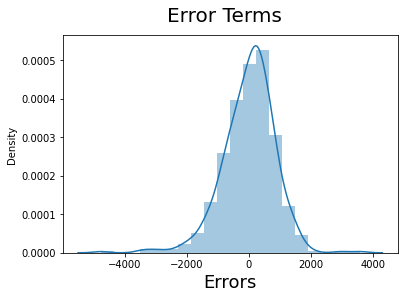

In [195]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

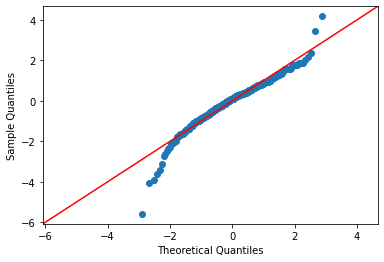

In [196]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

### **Step 9: Making prediction based on model coeff.**

###### ***Scaling Test Set***

In [197]:
num_vars=s1_test.columns.tolist()
num_vars.remove('cnt')
s1_test[num_vars] = scaler.transform(s1_test[num_vars])


In [198]:
s1_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,Cloudy,Light_RainSnow,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Summer,Autumn,Winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,4546.981735,0.500609,0.319635,0.027397,...,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.264840,0.246575,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,1898.633630,0.285836,0.467403,0.163612,...,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.442259,0.432005,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,3303.500000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,4579.000000,0.466667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,5869.500000,0.766667,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### ***Splitting Test Data***

In [199]:
y_test = s1_test.pop('cnt')
X_test = s1_test

In [200]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'day',
       'Cloudy', 'Light_RainSnow', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

In [201]:
#adding constant
X_test = X_test[feature_list]
X_test = sm.add_constant(X_test)

In [202]:
##get diffirence between two lists
set(X_test.columns.tolist())-set(feature_list)
len(feature_list)

17

In [203]:
# Making predictions using model

y_pred = lr_final.predict(X_test)

### **Step 10: Model Evaluation**

```
Reference:
https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/
```



Text(0, 0.5, 'y_pred')

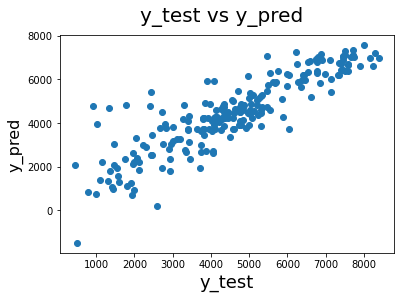

In [204]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


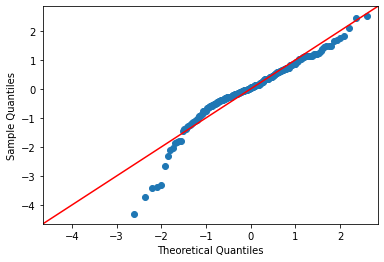

In [205]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_test - y_pred), fit=True, line='45')
plt.show()

Text(0.5, 0, 'Errors')

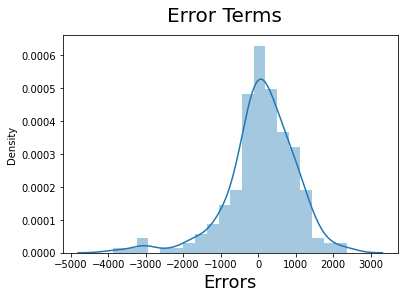

In [206]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

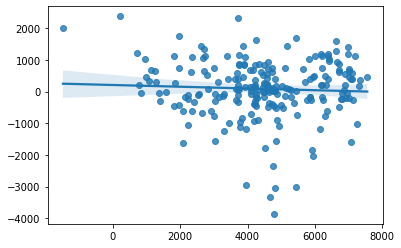

In [207]:
#plt.scatter(y_pred,(y_test - y_pred))
#plt.show()
sns.regplot(y_pred,y_test-y_pred,'r')
plt.show()

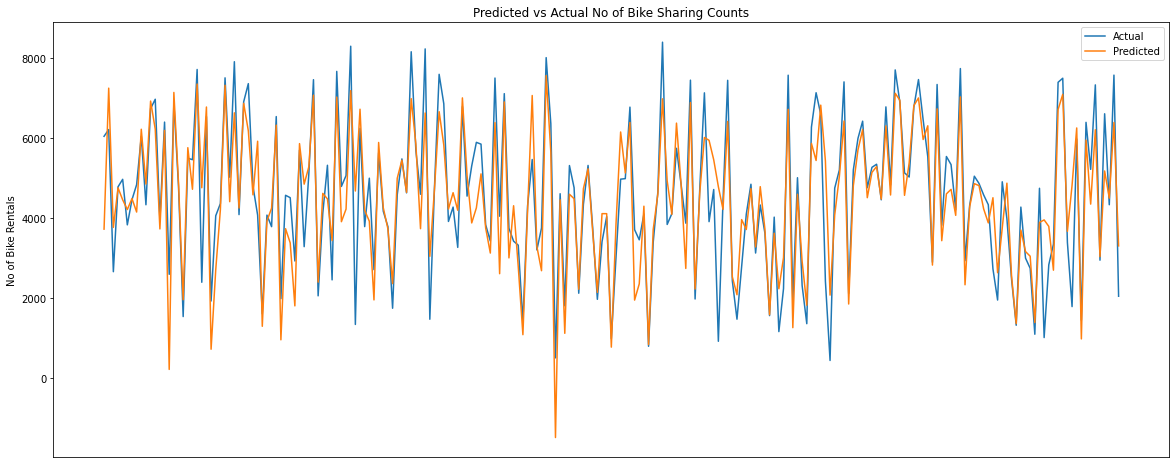

In [208]:
# Plotting Actual vs Predicted No of Shares 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Bike Sharing Counts');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


### ***Regression Metrics***

In [209]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse_train = mean_squared_error(y_train, y_train_cnt)
mae_train = mean_absolute_error(y_train, y_train_cnt)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_cnt)
MAPE_test = np.mean(np.abs(y_pred - y_test) / (y_test + 1e-5))
MAPE_train = np.mean(np.abs(y_train_cnt - y_train) / (y_train + 1e-5))
print('R-squared for train data:',round(r2_train,2))
print('R-squared for test data:',round(r2_test,2))
print('Mean Squared Error for train data',round(mse_train,3))
print('Mean Absolute Error for train data',round(mae_train,3))
print('Mean Squared Error for test data',round(mse_test,3))
print('Mean Absolute Error for test data',round(mae_test,3))
print('Mean Absolute Percentage Error for test data',round(MAPE_test,3))
print('Mean Absolute Percentage Error for train data',round(MAPE_train,3))

R-squared for train data: 0.81
R-squared for test data: 0.76
Mean Squared Error for train data 729245.591
Mean Absolute Error for train data 635.831
Mean Squared Error for test data 847885.966
Mean Absolute Error for test data 660.659
Mean Absolute Percentage Error for test data 0.242
Mean Absolute Percentage Error for train data 0.518
